In [1]:
import h5py

with h5py.File('protein_data_299_rgb_1.0.h5','r') as f:
    X_train = f['X_train'][:]
    X_test = f['X_test'][:]
    y_train = f['y_train'][:]
    y_test = f['y_test'][:]
    
print('load data successfully.')

load data successfully.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

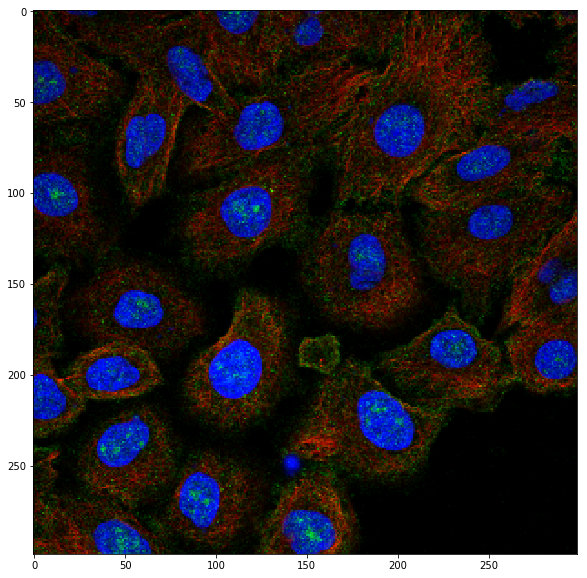

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(X_train[0])

In [2]:
#X_train = X_train.reshape(-1,512,512,1)

#X_test = X_test.reshape(-1,512,512,1)

In [3]:
#from keras.applications.xception_extend import Xception
from keras.applications.xception import Xception
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from time import time
import cv2

def preprocess(x):
    return x/127.5-1


Using TensorFlow backend.


In [4]:
inputs = Input(X_train.shape[1:])
x = Lambda(preprocess)(inputs)
x = Xception(include_top=False,pooling='avg',weights='imagenet')(x)
#x = Xception(include_top=False,pooling='avg',weights=None,input_shape = (512,512,1))(x)
x = Dropout(0.5)(x)
x = Dense(28,activation='softmax')(x)  
model = Model(inputs,x)

In [5]:
# 训练模型
from time import time
start = time()

batch_size = 24
epochs = 10
#optimizer = Nadam(lr=0.002)
optimizer = Adam(lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath='new_three-c-{epoch:.0f}-{val_loss:.3f}-{acc:.3f}.hdf5', 
                            monitor='val_loss', 
                            save_best_only=True,
                            save_weights_only=True, 
                            mode='min') 

hist = model.fit(X_train,y_train,batch_size=batch_size,
                validation_data=(X_test,y_test),
                callbacks=[checkpoint],
                epochs=epochs)
 

end = time()
print('training finished with',(end-start)/60,'min')

Train on 21749 samples, validate on 9322 samples
Epoch 1/10
21749/21749 [==============================] - 569s 26ms/step - loss: 2.6114 - acc: 0.4347 - val_loss: 2.0533 - val_acc: 0.5226
Epoch 2/10
21749/21749 [==============================] - 564s 26ms/step - loss: 1.8419 - acc: 0.5554 - val_loss: 1.8627 - val_acc: 0.5717
Epoch 3/10
21749/21749 [==============================] - 561s 26ms/step - loss: 1.3848 - acc: 0.6152 - val_loss: 1.8814 - val_acc: 0.5971
Epoch 4/10
21749/21749 [==============================] - 556s 26ms/step - loss: 0.9637 - acc: 0.6699 - val_loss: 1.9021 - val_acc: 0.5462
Epoch 5/10
21749/21749 [==============================] - 565s 26ms/step - loss: 0.7091 - acc: 0.6970 - val_loss: 1.9256 - val_acc: 0.5792
Epoch 6/10
  768/21749 [>.............................] - ETA: 8:15 - loss: 0.5697 - acc: 0.7344

KeyboardInterrupt: 

In [ ]:
#del X_train,X_test,y_train,y_test

In [ ]:
#import tensorflow as tf
#
#a = tf.constant([[1,2,3],[1,1,1],[2,2,2]])
#
##b = tf.constant([[1],[2],[3]])
#
#with tf.Session() as sess:
#    a = tf.reduce_sum(a,axis=1)
#    a = tf.reshape(a,[-1,1])
#    print(sess.run(a))
#
##del a,b